#데이터 전처리 작업


## 데이터 정제 (Data Cleaning)
- 잡음, 부적합, 결측치를 수정하고 읽을 수 없는 요소 제거
- 형식의 일관성을 유지하고 적합한 포맷으로 변환


### git 설정

- git에 수집 된 데이터를 불려오기 위한 git clone 설정

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#csv 파일 불려오기 위한 깃 클론
!git clone https://github.com/maximin90/Team_SeSAC.git

Cloning into 'Team_SeSAC'...
remote: Enumerating objects: 555, done.
remote: Counting objects: 100% (235/235), done.
remote: Compressing objects: 100% (153/153), done.
remote: Total 555 (delta 108), reused 179 (delta 81), pack-reused 320
Receiving objects: 100% (555/555), 90.57 MiB | 20.90 MiB/s, done.
Resolving deltas: 100% (207/207), done.
Updating files: 100% (73/73), done.


In [ ]:
# 디렉토리 변경
cd Team_SeSAC/

In [ ]:
# git 접근권한 부여를 위한 git 계정 추가
!git config --global user.email "iove0103@naver.com"
!git config --global user.name "yumioh"
!git status

In [ ]:
!git pull

In [ ]:
#깃 커밋
!git add .
!git commit -m 'new : add merged data file'

In [ ]:
#!git pull
#!git push origin ymNews

### 수집한 데이터인 cvs 파일 불려오기
- 매달 수집한 뉴스 데이터 병합하기

In [ ]:
import pandas as pd
import numpy as np
import os

#엑셀 파일 병합하기
filepath = f'/content/Team_SeSAC/yumi/data/'

#파일 경로
file_list = os.listdir(filepath)
#경로에 있는 모든 csv파일 리스트 불려오기
file_list_csv = [file for file in file_list if file.endswith('csv')]

#저장할 dataframe
merged_df = pd.DataFrame()

for file in file_list_csv:
  #read_excel기능으로 파일 읽음
  df = pd.read_csv(filepath + file, dtype='object')
  merged_df = merged_df.append(df)

#병합엑셀 파일 저장
merged_df.to_csv("/content/Team_SeSAC/yumi/data/[2023]_merge_news_data.csv",index=False, encoding='utf-8-sig',mode ='w')
merged_df.shape

<ipython-input-3-739761daa50e>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_df = merged_df.append(df)
<ipython-input-3-739761daa50e>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_df = merged_df.append(df)
<ipython-input-3-739761daa50e>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_df = merged_df.append(df)
<ipython-input-3-739761daa50e>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_df = merged_df.append(df)
<ipython-input-3-739761daa50e>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_df = merged

(30511, 5)

In [ ]:
#데이터 수집한 파일 들고 오기
merged_filename = f'[2023]_merge_news_data.csv'
filepath = f'/content/Team_SeSAC/yumi/data/'+ merged_filename

df = pd.read_csv(filepath)
df.shape

(30511, 5)

### 결측지 제거 : 비어 있는 행 제거

In [ ]:
df = df.dropna(axis=0)
df.shape
df.head(10)

,Unnamed: 0,title,date,media,content
0,0.0,‘엔비디아 한방’에 7만전자 안착…개미들 “10만전자까지 가즈아”,2023.09.01,매일경제,[사진=연합뉴스]올 4분기 고사양 메모리 반도체의 수요 확대 기대감이 커지고 있다....
1,1.0,"""빌어먹을 새들 모두 없어져야""…머스크, 트위터 인수 전말",2023.09.01,연합뉴스,20년전 실패한 슈퍼앱 엑스닷컴 구상이 남긴 미련이 발단하와이 휴가 중 인수 선언…...
2,2.0,AI칩 시장 판 키우는 K반도체,2023.09.01,매일경제,삼성전자 HBM3 납품 호재목표주가 11만원 → 12만원엔비디아 등 AI칩 공급 경...
3,3.0,"中, 경제위기론 선긋기…""中 붕괴·美 번영은 망상""(종합)",2023.09.01,이데일리,셰펑 주미 중국대사 워싱턴포스트 기고신화 서방서 의도적으로 중국 깎아내려[홍콩=이데...
4,4.0,"중국 ""경제 위기론은 망상""... 당국, 부동산 계약금 인하 '경기 회복' 안간힘",2023.09.01,한국일보,셰펑 주미 중국대사 미 워싱턴포스트 기고중국 경제 당신 생각보다 나아지고 있다당국 ...
5,5.0,"2주 만에 또…테슬라, 중국서 고급형 모델S·X 가격 인하",2023.09.01,이데일리,모델S 약 1000만원 모델X 약 1800만원 내려고급형 모델 가격 인하에…수익성 ...
6,6.0,"테슬라, 중국서 신형 '모델3' 공개…""올 4분기 인도 시작""",2023.09.01,이데일리,부분변경 모델3 공개…유럽·일본·호주서 첫 출시가격 500만원 인상…주행거리 최대 ...
7,7.0,"[단독] 1.5배 레버리지 ETF, 12월부터 허용",2023.09.01,서울경제,당국 소수점 인버스 ETF 등 도입美 등 해외로 투자금 유출 방지책2000원 미만은...
8,8.0,한여름에도 55℃ 철길 옆을 떠나지 못하는 사람들,2023.09.01,오마이뉴스,[공동기획_공공철도가 기후정의다②] 폭염·폭우 속 철도 지키는 시설관리원의 하루철도...
9,9.0,"'로드스터' 눈매 닯은 신형 테슬라 모델 3, 중국 시장 가격 500만원 올랐다",2023.09.01,블로터,테슬라 신형 모델 3가 1일 출시돼 중국 뉴질랜드 일본 등에서 우선 판매된다. (사...


### 목적에 맞는 정보 수집을 위해 불필요한 정보제거
- media(신문매체이름), Unnamed 열 제거
- 정규화를 통한 공백처리, 한글만 추출 등 부적합한 요소 제거
- 140자 이하 신문기사 내용 제외
- 1차 처리된 데이터 cvs파일로 저장


In [ ]:
df.drop(['media','Unnamed: 0'],axis=1,inplace = True)
df.shape
df.head(10)

,title,date,content
0,‘엔비디아 한방’에 7만전자 안착…개미들 “10만전자까지 가즈아”,2023.09.01,[사진=연합뉴스]올 4분기 고사양 메모리 반도체의 수요 확대 기대감이 커지고 있다....
1,"""빌어먹을 새들 모두 없어져야""…머스크, 트위터 인수 전말",2023.09.01,20년전 실패한 슈퍼앱 엑스닷컴 구상이 남긴 미련이 발단하와이 휴가 중 인수 선언…...
2,AI칩 시장 판 키우는 K반도체,2023.09.01,삼성전자 HBM3 납품 호재목표주가 11만원 → 12만원엔비디아 등 AI칩 공급 경...
3,"中, 경제위기론 선긋기…""中 붕괴·美 번영은 망상""(종합)",2023.09.01,셰펑 주미 중국대사 워싱턴포스트 기고신화 서방서 의도적으로 중국 깎아내려[홍콩=이데...
4,"중국 ""경제 위기론은 망상""... 당국, 부동산 계약금 인하 '경기 회복' 안간힘",2023.09.01,셰펑 주미 중국대사 미 워싱턴포스트 기고중국 경제 당신 생각보다 나아지고 있다당국 ...
5,"2주 만에 또…테슬라, 중국서 고급형 모델S·X 가격 인하",2023.09.01,모델S 약 1000만원 모델X 약 1800만원 내려고급형 모델 가격 인하에…수익성 ...
6,"테슬라, 중국서 신형 '모델3' 공개…""올 4분기 인도 시작""",2023.09.01,부분변경 모델3 공개…유럽·일본·호주서 첫 출시가격 500만원 인상…주행거리 최대 ...
7,"[단독] 1.5배 레버리지 ETF, 12월부터 허용",2023.09.01,당국 소수점 인버스 ETF 등 도입美 등 해외로 투자금 유출 방지책2000원 미만은...
8,한여름에도 55℃ 철길 옆을 떠나지 못하는 사람들,2023.09.01,[공동기획_공공철도가 기후정의다②] 폭염·폭우 속 철도 지키는 시설관리원의 하루철도...
9,"'로드스터' 눈매 닯은 신형 테슬라 모델 3, 중국 시장 가격 500만원 올랐다",2023.09.01,테슬라 신형 모델 3가 1일 출시돼 중국 뉴질랜드 일본 등에서 우선 판매된다. (사...


In [ ]:
#나중에 주식 데이터와 합치기 위함 열 이름 통일
df = df.rename(columns={'date' : '날짜'})
#날짜 타입으로 변경
df['날짜'] = pd.to_datetime(df['날짜'])
df[:10]

,title,날짜,content
0,‘엔비디아 한방’에 7만전자 안착…개미들 “10만전자까지 가즈아”,2023-09-01,[사진=연합뉴스]올 4분기 고사양 메모리 반도체의 수요 확대 기대감이 커지고 있다....
1,"""빌어먹을 새들 모두 없어져야""…머스크, 트위터 인수 전말",2023-09-01,20년전 실패한 슈퍼앱 엑스닷컴 구상이 남긴 미련이 발단하와이 휴가 중 인수 선언…...
2,AI칩 시장 판 키우는 K반도체,2023-09-01,삼성전자 HBM3 납품 호재목표주가 11만원 → 12만원엔비디아 등 AI칩 공급 경...
3,"中, 경제위기론 선긋기…""中 붕괴·美 번영은 망상""(종합)",2023-09-01,셰펑 주미 중국대사 워싱턴포스트 기고신화 서방서 의도적으로 중국 깎아내려[홍콩=이데...
4,"중국 ""경제 위기론은 망상""... 당국, 부동산 계약금 인하 '경기 회복' 안간힘",2023-09-01,셰펑 주미 중국대사 미 워싱턴포스트 기고중국 경제 당신 생각보다 나아지고 있다당국 ...
5,"2주 만에 또…테슬라, 중국서 고급형 모델S·X 가격 인하",2023-09-01,모델S 약 1000만원 모델X 약 1800만원 내려고급형 모델 가격 인하에…수익성 ...
6,"테슬라, 중국서 신형 '모델3' 공개…""올 4분기 인도 시작""",2023-09-01,부분변경 모델3 공개…유럽·일본·호주서 첫 출시가격 500만원 인상…주행거리 최대 ...
7,"[단독] 1.5배 레버리지 ETF, 12월부터 허용",2023-09-01,당국 소수점 인버스 ETF 등 도입美 등 해외로 투자금 유출 방지책2000원 미만은...
8,한여름에도 55℃ 철길 옆을 떠나지 못하는 사람들,2023-09-01,[공동기획_공공철도가 기후정의다②] 폭염·폭우 속 철도 지키는 시설관리원의 하루철도...
9,"'로드스터' 눈매 닯은 신형 테슬라 모델 3, 중국 시장 가격 500만원 올랐다",2023-09-01,테슬라 신형 모델 3가 1일 출시돼 중국 뉴질랜드 일본 등에서 우선 판매된다. (사...


In [ ]:
import re, unicodedata
from string import whitespace

pattern_whitespace = re.compile(f'[{whitespace}]+')
# NaN 값을 빈 문자열로 대체
df['content_data'] = df['content'].fillna('').astype(str)

# 공백 처리 및 정규화
pattern_whitespace = re.compile(f'[{whitespace}]+')

df['content_data'] = df['content_data'].str.replace(
    pattern_whitespace, ' '
).map(lambda x: unicodedata.normalize('NFC', x)).str.strip()

In [ ]:
def clean_byline(text):
    # byline
    pattern_email = re.compile(r'[-_0-9a-z]+@[-_0-9a-z]+(?:\.[0-9a-z]+)+', flags=re.IGNORECASE)
    pattern_url = re.compile(r'(?:https?:\/\/)?[-_0-9a-z]+(?:\.[-_0-9a-z]+)+', flags=re.IGNORECASE)
    pattern_others = re.compile(r'\.([^\.]*(?:기자|특파원|지난해|교수|서울|사진|작가|뉴스|대표|논설|고문|주필|부문장|팀장|장관|원장|연구원|이사장|위원|실장|차장|부장|에세이|화백|사설|소장|단장|과장|기획자|큐레이터|저작권|평론가|©|©|ⓒ|\@|\/|=|:앞쪽_화살표:|무단|전재|재배포|금지|\[|\]|\(\))[^\.]*)$')
    pattern_onlyKorean = re.compile('[^ ㄱ-ㅣ가-힣]+') #한글과 띄어쓰기만 추출
    result = pattern_email.sub('', text)
    result = pattern_url.sub('', result)
    result = pattern_others.sub('.', result)
    result = pattern_onlyKorean.sub('',result)
    # 본문 시작 전 꺽쇠로 쌓인 바이라인 제거
    pattern_bracket = re.compile(r'^((?:\[.+\])|(?:【.+】)|(?:<.+>)|(?:◆.+◆)\s)')
    result = pattern_bracket.sub(' ', result).strip()
    return result

 #불용어 처리 content열에 함수 적용
df['content_data'] = df['content_data'].map(clean_byline)

In [ ]:
#content 기사 길이가 140자 이하인 경우 제외
df = df.loc[df['content_data'].str.len() > 140]
df.shape

(29751, 4)

In [ ]:
#전처리 된 파일 날짜와 본문만 cvs로 파일 저장
df[['날짜','content_data']].to_csv('/content/Team_SeSAC/yumi/data/telsa_preprosessing.csv',encoding='utf-8-sig')

In [ ]:
#전처리된 엑셀 파일 읽어 오기
filename = f'telsa_preprosessing.csv'
filepath = f'/content/Team_SeSAC/yumi/data/'+ filename

#형태소 분석 dataframe : word_df
words_df = pd.read_csv(filepath)

words_df.drop('Unnamed: 0',axis=1,inplace = True)
print(words_df.shape, words_df)

(29751, 2)                날짜                                       content_data
0      2023-09-01  사진연합뉴스올 분기 고사양 메모리 반도체의 수요 확대 기대감이 커지고 있다삼성전자가...
1      2023-09-01  년전 실패한 슈퍼앱 엑스닷컴 구상이 남긴 미련이 발단하와이 휴가 중 인수 선언흥분충...
2      2023-09-01  삼성전자  납품 호재목표주가 만원  만원엔비디아 등 칩 공급 경쟁메모리 점유율 확대...
3      2023-09-01  셰펑 주미 중국대사 워싱턴포스트 기고신화 서방서 의도적으로 중국 깎아내려홍콩이데일리...
4      2023-09-01  셰펑 주미 중국대사 미 워싱턴포스트 기고중국 경제 당신 생각보다 나아지고 있다당국 ...
...           ...                                                ...
29746  2023-08-30  경쟁 치열 기업들도 약진임세영 기자  세계 최대 가전정보기술 박람회   개막 이틀째...
29747  2023-08-30  내달 일 포럼에 둘 다 초대돼그간 서 현피 놓고 설전 벌여사이버 공간에서 다투다가 ...
29748  2023-08-30  민간 주도로 도시 건설하는 미국구글 웨스트미 샌프란시스코에서 북동쪽으로 약  떨어져...
29749  2023-08-30  한국 경제의 뉴 엔진  미래기술 탑재 질주하는 한국지난 월 일 경기 화성 현대차그룹...
29750  2023-08-30  엔비디아   만개 사용 세계 세번째 고성능완전 자율주행 기술 더 빠르게 교육하기 위...

[29751 rows x 2 columns]


### Counter 모듈을 이용하여 가장 많이 나오는 단어 추출

In [ ]:
# 상위 10개 단어 추출 함수
def word_counter(wordArr):
  all_word = [word for words in wordArr for word in words]
  word_count = Counter(all_word)
  most_commos_words = word_count.most_common(20)
  return most_commos_words

In [ ]:
from collections import Counter

#공백으로 본문 내용 split
words_list = words_df['content_data'].str.split()
word_counter(words_list)

print(words_list[:10])

0    [사진연합뉴스올, 분기, 고사양, 메모리, 반도체의, 수요, 확대, 기대감이, 커지...
1    [년전, 실패한, 슈퍼앱, 엑스닷컴, 구상이, 남긴, 미련이, 발단하와이, 휴가, ...
2    [삼성전자, 납품, 호재목표주가, 만원, 만원엔비디아, 등, 칩, 공급, 경쟁메모리...
3    [셰펑, 주미, 중국대사, 워싱턴포스트, 기고신화, 서방서, 의도적으로, 중국, 깎...
4    [셰펑, 주미, 중국대사, 미, 워싱턴포스트, 기고중국, 경제, 당신, 생각보다, ...
5    [모델, 약, 만원, 모델, 약, 만원, 내려고급형, 모델, 가격, 인하에수익성, ...
6    [부분변경, 모델, 공개유럽일본호주서, 첫, 출시가격, 만원, 인상주행거리, 최대,...
7    [당국, 소수점, 인버스, 등, 도입, 등, 해외로, 투자금, 유출, 방지책원, 미...
8    [공동기획공공철도가, 기후정의다, 폭염폭우, 속, 철도, 지키는, 시설관리원의, 하...
9    [테슬라, 신형, 모델, 가, 일, 출시돼, 중국, 뉴질랜드, 일본, 등에서, 우선...
Name: content_data, dtype: object


### 기사내용을 공백으로 토큰화
 - 토큰화는 단어별로 분리하는 단어 토큰화와 문자별로 분리하는 문장 토큰화로 구분


In [ ]:
docs = words_df['content_data']

#공백으로 토큰화
tokenized_docs = []
for doc in docs:
  tokenized_docs.append(doc.split())

In [ ]:
word_counter(tokenized_docs)

[('수', 57530),
 ('있다', 52066),
 ('전기차', 51057),
 ('미국', 45948),
 ('년', 45656),
 ('등', 44367),
 ('월', 43500),
 ('테슬라', 42265),
 ('것으로', 38579),
 ('있는', 33585),
 ('일', 33352),
 ('중국', 28377),
 ('이', 25331),
 ('지난해', 24698),
 ('지난', 24303),
 ('배터리', 23172),
 ('대한', 22071),
 ('올해', 21707),
 ('따르면', 21477),
 ('는', 20993)]

## LDA 모델링 (불용화 처리전)

In [ ]:
from gensim import corpora

id2word = corpora.Dictionary(tokenized_docs)
print(id2word)

Dictionary<640758 unique tokens: ['가격', '가격도', '가격은', '가격이', '가동할']...>


In [ ]:
for value in id2word:
  print(value, id2word[value])

In [ ]:
corpus_TDM = []
for doc in tokenized_docs:
  #print(doc)
  result = id2word.doc2bow(doc)
  corpus_TDM.append(result)

In [ ]:
from gensim.models import LdaModel, TfidfModel

tfidf = TfidfModel(corpus_TDM)
corpus_TFIDF = tfidf[corpus_TDM]

n = 10 #토픽의 개수
lda = LdaModel(corpus=corpus_TFIDF,
               id2word=id2word,
               num_topics=n,
               random_state=100)

# for t in lda.print_topics():
#   print(t[0],":",t[1])

## 형태소 및 불용어 처리
 - 빠른 처리를 위해 mecab 모듈을 이용한 형태소 분류


### mecab 설치

In [ ]:
#mecab 설치
!git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git
%cd Mecab-ko-for-Google-Colab/
!bash ./install_mecab-ko_on_colab_light_220429.sh

Cloning into 'Mecab-ko-for-Google-Colab'...
remote: Enumerating objects: 138, done.
remote: Counting objects: 100% (47/47), done.
remote: Compressing objects: 100% (38/38), done.
remote: Total 138 (delta 26), reused 22 (delta 8), pack-reused 91
Receiving objects: 100% (138/138), 1.72 MiB | 5.91 MiB/s, done.
Resolving deltas: 100% (65/65), done.
/content/Mecab-ko-for-Google-Colab
Installing konlpy.....
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 48.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 kB 46.5 MB/s eta 0:00:00
Done
Installing mecab-0.996-ko-0.9.2.tar.gz.....
from https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
--2023-10-31 13:28:55--  https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
Resolving bitbucket.org (bitbucket.org)... 104.192.141.1, 2406:da00:ff00::22cd:e0db
Connecting to bitbucket.org (bitbucket.org)|104.192.141.1|:443... connected.
HTTP request sent, awaiting response.

In [ ]:
#konply install
#!pip install konlpy

### 형태소 처리
- mecab을 통해 형태소 단위로 나눔

In [ ]:
from konlpy.tag import Mecab

mecab = Mecab()

#df['tokenized_content'] = words_df['content_data'].apply(lambda x: mecab.morphs(x))
#df['tokenized_content']

### 품사부착 (PoS Tagging)
- 명사만 추출
- 최빈어를 조회하여 불용어 제거 대상 선정

In [ ]:
#명사만 분류 (nouns)
from konlpy.tag import Mecab
mecab = Mecab()
words_df['nouns_content'] = words_df['content_data'].apply(lambda x: mecab.nouns(x))

In [ ]:
words_df['nouns_content'][:10]

0    [사진, 연합뉴스, 세계, 국부, 펀드, 노르웨이, 국부, 펀드, 지난해, 최악, ...
1    [미, 법무부, 관련, 문건, 제출, 허위, 과장, 홍보, 수사, 일환, 듯, 미국...
2    [혁신, 역대, 최고, 월간, 수익, 월중, 테슬라, 등, 주요, 편입, 종목, 급...
3    [앵커, 우리, 증시, 주요, 기업, 실적, 발표, 영향, 증시, 프리즘, 홍헌표,...
4    [테슬라, 지난해, 비트코인, 가격, 하락, 억, 원, 손실, 것, 월, 현지, 시...
5    [대기, 기간, 개월, 개월, 고금리, 고객, 취소, 대책, 금리, 중도, 상환, ...
6    [이동해, 나선, 팽창, 스페이스, 위성, 로켓, 추정, 일본, 국립, 천문대, 일...
7    [캐나다, 광, 산업체, 억, 배터리, 소재, 투자, 최대, 규모, 작년, 분기, ...
8    [김경남, 웨이, 대표, 이사, 인공지능, 사진, 영상, 인식, 시대, 도래, 지금...
9    [작년, 분기, 사상, 최대, 영업, 이익, 전기차, 수요, 붕괴, 우려, 무색, ...
Name: nouns_content, dtype: object

### 불용어 처리(stopwords)
- 자연어처리를 위해 불필요한 요소를 제거
- 최빈어 조회하여 불용어 제거 대상을 선정
- TF-IDF란 : DTM 내의 각 단어들마다 중요한 정도를 가중치로 줌

In [ ]:
stop_words = ['월', '위', '일', '억', '년', '원', '지난해', '를', '것', '등','차','올해','챗'
              '위', '가', '조', '의', '및','약','수','주','기자','만','이','중','말','마하','미','거','게','고','분','때문','때','더','점','씨',
              '전','개','디','은','론','닉','키','김','책','그',
              '팀','스케','용','닉스', '이번', '그룹', '현지', '로이터', '전국', '하나', '루', '중이', '경찰', '자기', '확인', '운동', '남성',
              '확', '집', '전달', '토크', '륜', '의학', '거주', '곳', '소', '기', '재', '하이', '초', '공간', '배포', '총',
              '무단', '이마트', '대구', '저작권', '강동', '수다', '뉴스', '줌', '텍사스', '헬', '대신', '이름', '텍', '텍사스주',
              '플로리다', '캘리포니아주', '약관', '본사', '건', '장기', '감염증', '캐릭터', '달이', '김혜민', '청원', '창',
              '마스터', '산', '강원도', '부분', '주인', '알렉스', '제', '좀', '네', '보', '로직', '루다', '중산', '생수', '엠씨',
              '선', '타이', '커피', '에브리싱', '명의', '베이커', '크루', '스프링', '완', '타고', '세션', '순', '발', '스틱'
              '개사', '만점', '대성', '데일리안', '킥', '수단', '부문', '플라잉', '별', '날', '장', '대한', '기업', '뉴욕', '가장',
              '로', '달', '대표', '업체', '사업', '미래','계획', '세계', '회사', '업계',
              '기존', '통해', '관련', '현재', '지난', '시장', '카','그룹', '차량', '협업', '행차', '기록', '백화점', '대비',
              '대로', '전체', '고객', '공개', '서울', '이상', '아이오', '적용', '예정', '시간', '예상', '사', '로',
              '예스', '교수', '게임', '아이', '선', '대비', '며', '업종', '뉴시스', '서명', '바이', '산', '파이낸셜 뉴스',
              '이후', '보도', '제','총', '가장', '제프', '억만장자', '최고', '부자','창업', '조스', '최대', '지급',
              '국고', '차등', '위해', '미만', '이상', '경우', '개편', '일부', '지금', '생각', '우리', '요', '또', '앵커',
              '상황', '얘기', '정도', '안', '사실', '사람', '하나', '좀', '경우', '재개', '부분', '가지', '계속', '오늘',
              '볼', '걸', '수도', '저','왜', '회장', '박', '대해', '며', '영상', '자신', '에스', '명', '이메일', '사업자',
              '최근', '응답', '리움', '정부', '대표', '대통령', '국민', '면', '부산', '정치', '후보', '오늘', '안',
              '문', '장관', '회의', '사회', '주택', '제', '힘', '민주당', '오', '최근', '요', '와이드', '지리', '목표']

def remove_korean_stopwords(nouns_list):
    return [word for word in nouns_list if word not in stop_words]

#텍스터 데이터 리스트로 변환
words_list = words_df['nouns_content'].tolist()

#불용어처리
words_df['nouns_content'] = words_df['nouns_content'].map(remove_korean_stopwords)
clean_words = words_df['nouns_content']
print('불용어 제거 후 : ', clean_words[:20])

불용어 제거 후 :  0     [사진, 연합뉴스, 분기, 사양, 메모리, 반도체, 수요, 확대, 기대감, 삼성전자...
1     [실패, 슈퍼, 앱, 엑스, 닷컴, 구상, 미련, 발단, 휴가, 선언, 흥분, 충동...
2     [삼성전자, 납품, 호, 재목, 표주, 비디아, 칩, 공급, 경쟁, 메모리, 점유,...
3     [셰, 주미, 중국, 대사, 워싱턴, 포스트, 기고, 신화, 방서, 도적, 중국, ...
4     [셰, 주미, 중국, 대사, 워싱턴, 포스트, 중국, 경제, 당신, 당국, 구매, ...
5     [모델, 모델, 고급, 모델, 가격, 인하, 수익, 악화, 전기차, 경쟁, 치열, ...
6     [변경, 모델, 유럽, 일본, 호주, 출시, 가격, 인상, 주행, 거리, 홍콩, 데...
7     [당국, 소수점, 버스, 도입, 해외, 투, 자금, 유출, 방지, 책원, 단위, 호...
8     [공동, 기획, 공공, 철도, 기후, 정의, 폭염, 폭우, 속, 철도, 시설, 관리...
9     [테슬라, 신형, 모델, 출시, 중국, 뉴질랜드, 일본, 판매, 사진, 테슬라, 테...
10    [주행, 거리, 상하, 토리, 생산, 중국, 유럽, 중동, 판매, 신, 모델, 테슬...
11    [출시, 디자인, 변경, 주행, 거리, 증가, 충전, 테슬라, 신형, 모델, 모습,...
12    [넥스트, 칩, 사진, 넥스트, 칩, 제공, 파이낸셜, 자율, 주행, 반도체, 팹,...
13    [트위터, 개조, 다음, 놀잇거리, 지분, 매입, 주일, 전격, 인수, 결정, 트위...
14    [서방, 개국, 웨어, 침투, 경고, 우크라, 군, 병사, 연합뉴스, 자료, 사진,...
15    [모터쇼, 내달, 뮌헨, 개막, 벤츠, 폭스바겐, 출격, 현대모비스, 삼성전자, 품...
16    [모델, 개선, 버전, 자체, 웹, 사이트, 테슬라, 중국, 판매, 시작, 모델, ...
17    [중국, 출시, 모델, 개선, 버전, 하이랜드, 테슬라

In [ ]:
# 최빈어를 조회하여 불용어 제거 대상 선정
most_common_tag = []
for token in clean_words:
  most_common_tag += token
Counter(most_common_tag).most_common(30)

[('테슬라', 110750),
 ('미국', 79579),
 ('중국', 58855),
 ('전기차', 58480),
 ('달러', 58211),
 ('머스크', 45971),
 ('투자', 43613),
 ('배터리', 41050),
 ('주가', 35884),
 ('가격', 33997),
 ('지수', 32849),
 ('상승', 32636),
 ('자동차', 31994),
 ('기술', 30753),
 ('모델', 29189),
 ('하락', 28826),
 ('전기', 28184),
 ('생산', 27095),
 ('금리', 26182),
 ('분기', 24135),
 ('가능', 23242),
 ('전망', 22862),
 ('반도체', 22621),
 ('판매', 22192),
 ('발표', 22138),
 ('한국', 21962),
 ('증시', 21830),
 ('이날', 21384),
 ('공장', 21251),
 ('실적', 20970)]

# 데이터 분석

## 라쏘회귀이란 (LASSO)
 - 선형 회귀는 비용함수인 mse를 최소하하는 방향으로 머신러닝 모델이 학습을 진행함
 - 열의 개수가 많아질수록 과적합 될 가능성이 높아져 어느정도 규제를 줌으로써 과적합 되는 것을 방지하는 Ridge와 Lasso 사용
 - 시그마 앞 알파값을 통해 규제 정도를 얼마나 줄기 조절
 - alpha값 크면 규제 강도가 세지므로 계수값을 더 줄이고 더 과소적합 되도록 유도
 - alpha값 작으면 계수를 줄이는 역할이 줄어들고 선형회귀 모델과 유사해지므로 과대적합 될 가능성이 큼
 - 적절한 alpha값을 찾는 법:
  alpha값에 대한 r^2값의 그래프를 그려봄
  훈련 세트와 테스트 세트의 점수가 가장 가까운 지점이 최적의 alpha값이 됨
 - 변수를 0으로 만듬 -> 필요없는 변수를 제외시킴

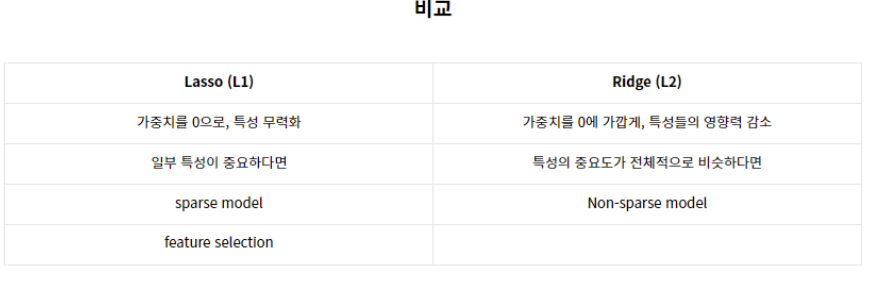

### 테슬라 주식과 날짜 데이터 변환
- 테슬라 csv 파일 불려오기
- 불필요한 정보 제거 및 날짜 형식 맞춤
- 날짜별 뉴스 기사 개수와 주식 거래량 데이터를 합쳐서 결측값을
  찾아 내어 휴일 제외 시키기


#### 테슬라 주식 데이터 Dataframe

In [ ]:
import pandas as pd
import numpy as np
import os

#엑셀 파일 병합하기
filepath = f'/content/Team_SeSAC/stock_data/'

#불려올 파일 전체 리스트 (2020.01 ~ 2023.09)

file_list = ['TSLA_DATA_2020_daily.csv','TSLA_DATA_2022_daily.csv','TSLA_DATA_2021_daily.csv','TSLA_DATA_202309_daily.csv']

#저장할 dataframe : stocks_df
stocks_df = pd.DataFrame()

for file in file_list:
  #read_excel기능으로 파일 읽음
  csv_df = pd.read_csv(filepath + file, dtype='object')
  print(filepath + file)
  stocks_df = stocks_df.append(csv_df)

#병합엑셀 파일 저장
stocks_df.to_csv("/content/Team_SeSAC/yumi/data/total_merge_stocks_data.csv",index=False, encoding='utf-8-sig')
stocks_df.shape

/content/Team_SeSAC/stock_data/TSLA_DATA_2020_daily.csv
/content/Team_SeSAC/stock_data/TSLA_DATA_2022_daily.csv
/content/Team_SeSAC/stock_data/TSLA_DATA_2021_daily.csv
/content/Team_SeSAC/stock_data/TSLA_DATA_202309_daily.csv


<ipython-input-23-57dd976b91a0>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stocks_df = stocks_df.append(csv_df)
<ipython-input-23-57dd976b91a0>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stocks_df = stocks_df.append(csv_df)
<ipython-input-23-57dd976b91a0>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stocks_df = stocks_df.append(csv_df)
<ipython-input-23-57dd976b91a0>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stocks_df = stocks_df.append(csv_df)


(943, 7)

In [ ]:
#주가 데이터 수집한 파일 한개 들고 오기 (2023.01 ~ 2023.09)
filepath = f'/content/Team_SeSAC/stock_data/TSLA_DATA_202309_daily.csv'

#주가 데이터 dataframe : stock_daily_df
stock_daily_df = pd.DataFrame()

#주가 데이터 병합엑셀 파일 저장
stock_daily_df.to_csv("/content/Team_SeSAC/yumi/data/[2023]_merge_stocks_data.csv",index=False, encoding='utf-8-sig')

#주가 데이터 파일 읽기
stock_daily_df = pd.read_csv(filepath)

#dateime으로 타입 변환
stock_daily_df['날짜'] = pd.to_datetime(stock_daily_df['날짜'])
#stock_daily_df.info()
stock_daily_df

,날짜,종가,시가,고가,저가,거래량,변동 %
0,2023-09-29,250.22,250.00,254.77,246.35,128.52M,1.56%
1,2023-09-28,246.38,240.02,247.55,238.65,116.51M,2.44%
2,2023-09-27,240.50,244.26,245.33,234.58,136.06M,-1.48%
3,2023-09-26,244.12,242.98,249.55,241.66,101.53M,-1.16%
4,2023-09-25,246.99,243.38,247.10,238.31,104.09M,0.86%
...,...,...,...,...,...,...,...
182,2023-01-09,119.77,118.96,123.52,117.11,190.28M,5.93%
183,2023-01-06,113.06,103.00,114.39,101.81,220.91M,2.47%
184,2023-01-05,110.34,110.51,111.75,107.16,157.99M,-2.90%
185,2023-01-04,113.64,109.11,114.59,107.52,180.39M,5.12%


In [ ]:
#거래량 M/B를 제외한 숫자로만 표기
stock_daily_df['거래량'] = pd.to_numeric(stock_daily_df['거래량'].str.replace('M', ''))
stock_daily_df

,날짜,종가,시가,고가,저가,거래량,변동 %
0,2023-09-29,250.22,250.00,254.77,246.35,128.52,1.56%
1,2023-09-28,246.38,240.02,247.55,238.65,116.51,2.44%
2,2023-09-27,240.50,244.26,245.33,234.58,136.06,-1.48%
3,2023-09-26,244.12,242.98,249.55,241.66,101.53,-1.16%
4,2023-09-25,246.99,243.38,247.10,238.31,104.09,0.86%
...,...,...,...,...,...,...,...
182,2023-01-09,119.77,118.96,123.52,117.11,190.28,5.93%
183,2023-01-06,113.06,103.00,114.39,101.81,220.91,2.47%
184,2023-01-05,110.34,110.51,111.75,107.16,157.99,-2.90%
185,2023-01-04,113.64,109.11,114.59,107.52,180.39,5.12%


In [ ]:
# 거래량만 추출
stock_df = stock_daily_df[['날짜','거래량']]
stock_df

,날짜,거래량
0,2023-09-29,128.52
1,2023-09-28,116.51
2,2023-09-27,136.06
3,2023-09-26,101.53
4,2023-09-25,104.09
...,...,...
182,2023-01-09,190.28
183,2023-01-06,220.91
184,2023-01-05,157.99
185,2023-01-04,180.39


#### 테슬라 기사 데이터 Dataframe

In [ ]:
#기사 데이터 날짜별 기사 수 추출
news_cnt_daily = words_df.groupby(words_df['날짜']).count()['nouns_content']
news_cnt_daily

#daily_news_count = words_df.groupby(pd.Grouper(key='날짜', freq='B'))['nouns_content'].count()

daily_news_count = news_cnt_daily.reset_index()
daily_news_count.columns = ['날짜', '기사갯수']
daily_news_count.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   날짜      253 non-null    object
 1   기사갯수    253 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 4.1+ KB


#### 기사와 주식 Dataframe 데이터 정제

In [ ]:
#주식과 기사 데이터 df 합치기
#data_df = pd.merge(stock_df, daily_news_count,how='outer',on='날짜')
#data_df.info()

# 기사 데이터의 '날짜' 열을 datetime 형식으로 변환
daily_news_count['날짜'] = pd.to_datetime(daily_news_count['날짜'])

# 주식 데이터와 기사 데이터를 병합
data_df = pd.merge(stock_df, daily_news_count, how='outer', on='날짜')
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 267 entries, 0 to 266
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   날짜      267 non-null    datetime64[ns]
 1   거래량     187 non-null    float64       
 2   기사갯수    253 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 8.3 KB


In [ ]:
#결측지 제거 : 주가가 없는 날짜 제거 (주말)
data_df = data_df.dropna()
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 173 entries, 0 to 186
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   날짜      173 non-null    datetime64[ns]
 1   거래량     173 non-null    float64       
 2   기사갯수    173 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 5.4 KB


In [ ]:
#주가가 없는 날짜 제거(주식거래가 없는 주말제외)
data_df = data_df.dropna()

#날짜별 기사개수/주식거래량 수
stock_daily_volume = data_df['거래량']
news_daily_cnt = data_df['기사갯수']

#총 기사개수/거래량 수
#stock_volume = data_df['거래량'].sum()
#news_cnt = data_df['기사갯수'].sum()

print('날짜별 기사개수 : {}, 날짜별 주식 거래양 수 : {}'.format(news_daily_cnt, stock_daily_volume))
#print('총 기사개수 : {}, 총 주식거래양 수 : {} '.format(news_cnt, stock_volume))


날짜별 기사개수 : 0       39.0
1       45.0
2       81.0
3      128.0
4       85.0
       ...  
182    124.0
183    181.0
184    194.0
185    346.0
186    258.0
Name: 기사갯수, Length: 173, dtype: float64, 날짜별 주식 거래양 수 : 0      128.52
1      116.51
2      136.06
3      101.53
4      104.09
        ...  
182    190.28
183    220.91
184    157.99
185    180.39
186    231.40
Name: 거래량, Length: 173, dtype: float64


## 라쏘회귀 모델 생성 (LASSO)
- TF-IDF는 단어의 빈도수(TF)와 단어가 들어있는 문서 수의 반비례 하는 수(IDF)를 곱한값
- 기사 수(news_cnt) : X, 주식거래량(stock_volume) : y
- 각 데이터를 StandardScaler로 표준화하여 모델링

In [ ]:
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

#기사 수(news_cnt) : X, 주식거래량(stock_volume) : y

X = data_df['기사갯수'].values.reshape(-1,1)
y = data_df['거래량'].values.reshape(-1,1)

#X값 정규화
scaler_X = MinMaxScaler() #0,1분산으로 조정
# TF-IDF 행렬을 벡터화 배열로 변환 및 2차원 배열로 변경
X = scaler_X.fit_transform(X)

# y값(주식 거래량)을 벡터화 배열로 변환 2차원 배열로 변경
scaler_y = MinMaxScaler()
y = scaler_y.fit_transform(y)

# 데이터를 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 라쏘 회귀 모델 생성
#alpha값은 k-fold를 통해 구함
lasso_model = Lasso(alpha=0.01)

# K-fold 교차 검증을 사용하여 성능 평가
n_splits = 5  # K-fold 분할 수
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
mse_scores = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    lasso_model.fit(X_train, y_train)
    y_pred = lasso_model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)

# 각 fold에서의 MSE 출력
for i, mse in enumerate(mse_scores):
    print(f"Fold {i + 1} - MSE: {mse}")

#mse는 1이하로 나오는게 좋음
# mse = mean_squared_error(y_test, y_pred)
# print(f"평균 제곱 오차 (MSE): {mse}")

# R-squared (결정 계수) 계산 :
#0 ~1사이의 범위를 가짐 1에 가까울수록 선형회귀 모델에 높은 연관성을 가짐
r2 = r2_score(y, lasso_model.predict(X))

# 평균 MSE 출력
mean_mse = sum(mse_scores) / len(mse_scores)
print(f"alpha: {mean_mse}")
print(f"R-squared (결정 계수): {r2}")


Fold 1 - MSE: 0.03608687921353059
Fold 2 - MSE: 0.03344825642684596
Fold 3 - MSE: 0.024269743811513318
Fold 4 - MSE: 0.035436450549554147
Fold 5 - MSE: 0.019812887122723936
alpha: 0.02981084342483359
R-squared (결정 계수): -4.0999940235320054e-05


In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold
import numpy as np

# 데이터 불러오기 및 전처리 (X와 y 설정)

# 다양한 alpha 값 정의
alphas = [0.001, 0.01, 0.1, 1, 10, 100]

# K-fold 교차 검증 설정
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

best_alpha = None
best_mean_mse = float('inf')

for alpha in alphas:
    mse_scores = []
    lasso_model = Lasso(alpha=alpha)

    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        lasso_model.fit(X_train, y_train)
        y_pred = lasso_model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        mse_scores.append(mse)

    mean_mse = np.mean(mse_scores)

    if mean_mse < best_mean_mse:
        best_mean_mse = mean_mse
        best_alpha = alpha

print(f"최적의 alpha: {best_alpha}")
print(f"최적의 평균 MSE: {best_mean_mse}")

최적의 alpha: 0.01
최적의 평균 MSE: 0.02981084342483359



-벡터화
-tfidf_vectorizer = TfidfVectorizer()
-단어의 빈도수를 희소행렬로 변환하기 때문에 -tfidf_vectorizer를 사용 안함
- X = tfidf_vectorizer.fit_transform(news_cnt)


### K-Fold 교차검증
- train/test 나눠 머신 훈련시 과도하게 학습 데이터에 초점을 맞춰 훈련이 될수 있음 : 과접합
- 교차검증 : 훈련데이터 세트를 바꿔가며 훈련하면서 나온 평균을 정확도로 보는 방법

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

#n_splits :폴더개수
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
cv_accurancy = []

scores = []

#각 폴드에 대해 학습하고 예측 수행
fold_df_clf = DecisionTreeClassifier()

n_iter = 0
for train_idx, test_idx in kfold.split(X):
  # print("train_idx:", train_idx, len(train_idx))
  # print("test_idx:", test_idx, len(test_idx))
  #학습데이터와 검증 데이터 분할
  X_train, X_test = X[train_idx], X[test_idx]
  y_train, y_test = y[train_idx], y[test_idx]

  # 도델 학습 및 검증
  model = LinearRegression()
  model.fit(X_train, y_train)
  score = model.score(X_test, y_test)
  scores.append(score)

print("score 점수 : ",scores)
print("평균검증 정확도 : ",np.mean(scores))

score 점수 :  [-0.10610044519433282, -0.1043432711099932, -0.013346440695693351, -0.041323491247356126, -0.0010764402966370046]
평균검증 정확도 :  -0.0532380177088025


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## LDA 모델링

In [ ]:
from gensim.corpora.dictionary import Dictionary
#딕셔너리 생성
dic = Dictionary()
id2word = Dictionary(clean_words)
print(id2word)

Dictionary<49806 unique tokens: ['가격', '가동', '개당', '개발', '개발자']...>


In [ ]:
corpus_TDM = []
for doc in clean_words:
  #print(doc)
  result = id2word.doc2bow(doc)
  corpus_TDM.append(result)

In [ ]:
from gensim.models import LdaModel, TfidfModel
from gensim.models import ldamulticore

#tfidf로 벡터화 적용
tfidf = TfidfModel(corpus_TDM)
corpus_TFIDF = tfidf[corpus_TDM]

n = 30 #토픽의 개수
lda = ldamulticore.LdaMulticore(corpus=corpus_TFIDF,
                                id2word=id2word,
                                num_topics=n,
                                random_state=100,
                                passes=15,
                                workers=4)

for t in lda.print_topics():
  print(t[0],":",t[1])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


15 : 0.005*"베이거스" + 0.005*"녹화" + 0.003*"희토류" + 0.003*"급발진" + 0.003*"자석" + 0.003*"비스트" + 0.003*"센트리" + 0.003*"미스터" + 0.002*"바이어드" + 0.002*"출입"
6 : 0.024*"저커버그" + 0.011*"대결" + 0.010*"머스크" + 0.010*"운용" + 0.008*"격투기" + 0.008*"액티브" + 0.007*"격투" + 0.007*"이탈리아" + 0.007*"결투" + 0.006*"싸움"
14 : 0.008*"에디슨" + 0.007*"파텔" + 0.007*"파원" + 0.006*"절벽" + 0.006*"톡" + 0.005*"이찬원" + 0.004*"궤도" + 0.004*"해안" + 0.004*"세르비아" + 0.003*"임영웅"
21 : 0.007*"세뱃돈" + 0.005*"팬텀" + 0.004*"탐사" + 0.004*"경매" + 0.004*"코퍼" + 0.004*"레이티" + 0.003*"유한회사" + 0.003*"시초" + 0.003*"광산" + 0.003*"낙찰"
22 : 0.032*"스레드" + 0.032*"저커버그" + 0.015*"트위터" + 0.012*"메타" + 0.012*"머스크" + 0.011*"대결" + 0.009*"그램" + 0.009*"격투기" + 0.008*"엑스" + 0.008*"이용자"
20 : 0.008*"타이어" + 0.004*"금호" + 0.002*"배상금" + 0.002*"미납" + 0.002*"머독" + 0.001*"올레드" + 0.001*"테더" + 0.001*"빗" + 0.001*"전세기" + 0.001*"나리"
10 : 0.034*"상환" + 0.022*"기초" + 0.021*"조기" + 0.019*"만기" + 0.014*"자산" + 0.013*"개월" + 0.013*"상품" + 0.012*"원금" + 0.012*"청약" + 0.009*"최초"
25 : 0.016*"배터리" + 0.010*"전기차" + 0.0

### 분산처리

In [ ]:
#0.05 미만 분포는 무시
all_topics = lda.get_document_topics(corpus_TFIDF, minimum_probability=0.05, per_word_topics = False)

for idx, topic in enumerate(all_topics[:30]):
    print(idx, topic)

In [ ]:
#문서별 토픽 보기
doc_idx = 0
#lda.get_document_topics(corpus_TFIDF[doc_idx])

#0번 토픽 보기
#lda.show_topic(0)

In [ ]:
#로그 혼란도(0에 가까울수록 성능이 높음)
lda.log_perplexity(corpus_TFIDF)

In [ ]:
#다양도(1에 가까울 수록 성능이 높음)
topn = 25
top_words = set()

for topic in range(lda.num_topics):
    for word, prob in lda.show_topic(topic, topn=topn):
        top_words.add(word)

len(top_words) / (lda.num_topics * topn)


In [ ]:
for idx, topic in lda.print_topics(-1):
    print(f"Topic #{idx}: {topic}")

### LDA 모델의 토픽 리스트를 csv 파일로 저장

In [ ]:
def save_topics_csv(lda_model, num_topics, save_result_to: str = '/content/Team_SeSAC/yumi/data/lda_topics.csv'):
    # LDA 모델의 토픽 리스트를 csv파일로 저장

    topics = pd.Series(lda.print_topics(num_topics=num_topics, num_words=10))
    # topic	list
    # 0	    (0, '0.124*"키워드" + 0.084*"키워드" + 0.067*"키워드" + ... )
    # 1	    (1, '0.077*"키워드" + 0.077*"키워드" + 0.056*"키워드" + ... )
    # 2	    (2, '0.042*"키워드" + 0.037*"키워드" + 0.034*"키워드" + ... )
    topics.to_csv(save_result_to, mode='w', encoding='utf-8', header=['list'], index_label='topic')

# 시각화
- pyLDAvis를 이용

In [ ]:
#설치
!pip install pyLDAvis==3.4.1

!pip install --upgrade gensim
!pip install --upgrade pyLDAvis joblib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 23.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 80.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 102.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 34.8 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvico

In [ ]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

p = gensimvis.prepare(lda, corpus_TFIDF, id2word)

pyLDAvis.save_html(p, 'lda_visualization.html')

In [ ]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
#시각화를 노트북 셀이 표시하기 위함
# pyLDAvis.enable_notebook()
# vis = pyLDAvis.gensim.prepare(lda, corpus_TFIDF, id2word)
# pyLDAvis.display(vis)

pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda, corpus_TFIDF, id2word, mds='tsne')
pyLDAvis.display(vis)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


BrokenProcessPool: ignored